# Mounting Dataset dan Import Packages

Pada bagian ini, akan dijelaskan bagaimana mounting dataset dan apa packages yang dibutuhkan untuk proses data understanding, EDA, dan modelling.

In [ ]:
# Import Packages yang Dibutuhkan
import os # Untuk mounting data ke Google Colabs
import pandas as pd # Untuk mengelola data berbentuk tabel
import numpy as np # Untuk mengelola data berupa 
import seaborn as sns # Untuk visualisasi data
import matplotlib.pyplot as plt # Untuk visualisasi data
import matplotlib.dates as mdates # Untuk Time-Series Plot
from sklearn import preprocessing # Untuk Data Preprocessing
from pandas.plotting import autocorrelation_plot # Untuk Plotting Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # Untuk Melihat Korelasi ACF dan PACF
import statsmodels.api as sm # Untuk Membuat model statistik

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Mounting File Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mounting Binary Path ke Data
os.chdir('/content/drive/MyDrive/DBA AL - Kelompok 196/Taqiyudin Muhammad Khalil')

In [ ]:
# Memanggil Data
df = pd.read_csv('new_order_items.csv')
df

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,gender,num_of_item,ip_address,city,state,postal_code,browser,traffic_source
0,1243,860,683,28200,3407,Cancelled,2020-09-23,NaN,NaN,NaN,61.950001,M,1,60.42.59.118,Inhambupe,Bahia,48490-000,Chrome,Email
1,3559,2452,1956,925,9613,Processing,2022-05-31,NaN,NaN,NaN,49.990002,F,1,130.125.91.203,Seoul,Seoul,156-020,Firefox,Email
2,10745,7423,6093,14834,29017,Shipped,2020-12-17,2020-12-19,NaN,NaN,21.980000,F,1,190.245.171.77,Haikou,Guangdong,528247,Safari,Email
3,10746,7424,6093,5098,29021,Shipped,2021-03-06,2021-03-08,NaN,NaN,52.000000,F,1,190.245.171.77,Haikou,Guangdong,528247,Safari,Email
4,10744,7422,6093,5407,29015,Shipped,2020-12-17,2020-12-18,NaN,NaN,39.990002,F,1,190.245.171.77,Haikou,Guangdong,528247,Safari,Email
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912302,83687,57969,46664,638,226123,Processing,2022-03-20,NaN,NaN,NaN,36.000000,F,4,196.206.5.34,Brisbane,Queensland,4114,Safari,Facebook
4912303,89126,61766,49698,22531,240795,Complete,2022-01-21,2022-01-19,2022-01-21,NaN,95.000000,M,4,63.175.37.153,Großenhain,Sachsen,1561,Safari,Facebook
4912304,89123,61766,49698,27965,240786,Complete,2022-01-19,2022-01-19,2022-01-21,NaN,78.000000,M,4,63.175.37.153,Großenhain,Sachsen,1561,Safari,Facebook
4912305,89124,61766,49698,22340,240789,Complete,2022-01-19,2022-01-19,2022-01-21,NaN,21.500000,M,4,63.175.37.153,Großenhain,Sachsen,1561,Safari,Facebook


# Data Understanding

Pada bagian ini, dilakukan pemahaman dan melihat karakteristik pada dataset yang di mounting sebelumnya untuk mendapatkan insight dan pemilihan modelling yang tepat digunakan.

In [ ]:
# Melihat Kolom yang Berada pada Data
df.columns

Index(['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price', 'gender', 'num_of_item', 'ip_address', 'city', 'state',
       'postal_code', 'browser', 'traffic_source'],
      dtype='object')

In [ ]:
# Melihat Jumlah Baris dan Kolom
df.shape

(4912307, 19)

In [ ]:
# Melihat Tipe Data
df.dtypes

id                     int64
order_id               int64
user_id                int64
product_id             int64
inventory_item_id      int64
status                object
created_at            object
shipped_at            object
delivered_at          object
returned_at           object
sale_price           float64
gender                object
num_of_item            int64
ip_address            object
city                  object
state                 object
postal_code           object
browser               object
traffic_source        object
dtype: object

In [ ]:
# Melihat Informasi pada Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912307 entries, 0 to 4912306
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   order_id           int64  
 2   user_id            int64  
 3   product_id         int64  
 4   inventory_item_id  int64  
 5   status             object 
 6   created_at         object 
 7   shipped_at         object 
 8   delivered_at       object 
 9   returned_at        object 
 10  sale_price         float64
 11  gender             object 
 12  num_of_item        int64  
 13  ip_address         object 
 14  city               object 
 15  state              object 
 16  postal_code        object 
 17  browser            object 
 18  traffic_source     object 
dtypes: float64(1), int64(6), object(12)
memory usage: 712.1+ MB


In [ ]:
# Melihat Statistik Deskriptif dan Unique Value pada Data
cats = ['status','gender','city','state','browser','traffic_source']
nums = ['sale_price','num_of_item']

print(df[nums].describe().T,'\n')

for col in cats:
    print(f"jumlah nilai kolom {col}:")
    print(df[col].value_counts())
    print()

                 count       mean        std   min        25%        50%  \
sale_price   4912307.0  59.814239  65.466784  0.02  24.950001  39.990002   
num_of_item  4912307.0   2.504208   1.197323  1.00   1.000000   2.000000   

                   75%    max  
sale_price   69.980003  999.0  
num_of_item   4.000000    4.0   

jumlah nilai kolom status:
Shipped       1486232
Complete      1236793
Processing     987323
Cancelled      720856
Returned       481103
Name: status, dtype: int64

jumlah nilai kolom gender:
M    2484342
F    2427965
Name: gender, dtype: int64

jumlah nilai kolom city:
Shanghai        116581
Beijing         105462
Seoul            71329
Shenzhen         58727
New York         42175
                 ...  
Euskirchen           5
Olpe                 5
Eden Prairie         5
Bringelly            5
Tomago               5
Name: city, Length: 7614, dtype: int64

jumlah nilai kolom state:
Guangdong     263260
England       210565
California    183035
Shanghai      126077

In [ ]:
# Mengubah format menjadi datetime
df["created_at"] = pd.to_datetime(df["created_at"], dayfirst = True).dt.date
df["shipped_at"] = pd.to_datetime(df["shipped_at"], dayfirst = True).dt.date
df["delivered_at"] = pd.to_datetime(df["delivered_at"], dayfirst = True).dt.date
df["returned_at"] = pd.to_datetime(df["returned_at"], dayfirst = True).dt.date

In [ ]:
# Membuat Kolom Tahun dan Bulan
df["month"] = pd.DatetimeIndex(df["created_at"]).month
df["year"] = pd.DatetimeIndex(df["created_at"]).year

In [ ]:
# Melihat Missing Value
df.isna().sum()

id                         0
order_id                   0
user_id                    0
product_id                 0
inventory_item_id          0
status                     0
created_at                 0
shipped_at           1708179
delivered_at         3194411
returned_at          4431204
sale_price                 0
gender                     0
num_of_item                0
ip_address                 0
city                   49878
state                      0
postal_code                0
browser                    0
traffic_source             0
month                      0
year                       0
dtype: int64

In [ ]:
# Mengatasi Missing Value
df.drop(['returned_at'], axis=1, inplace=True)
df['city'] = df['city'].replace(np.nan, 'Others')

In [ ]:
df.isna().sum()

id                         0
order_id                   0
user_id                    0
product_id                 0
inventory_item_id          0
status                     0
created_at                 0
shipped_at           1708179
delivered_at         3194411
sale_price                 0
gender                     0
num_of_item                0
ip_address                 0
city                       0
state                      0
postal_code                0
browser                    0
traffic_source             0
month                      0
year                       0
dtype: int64

In [ ]:
df['city'].value_counts()

Shanghai        116581
Beijing         105462
Seoul            71329
Shenzhen         58727
Others           49878
                 ...  
Euskirchen           5
Olpe                 5
Eden Prairie         5
Bringelly            5
Tomago               5
Name: city, Length: 7615, dtype: int64

# Eksploratory Data Analysis (EDA)

Pada bagian ini, dilakukan proses EDA untuk melihat hubungan dan analisis karakteristik setiap kolom pada dataset untuk meningkatkan informasi yang dapat dilakukan modelling.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8205d82950>,
      dtype=object)

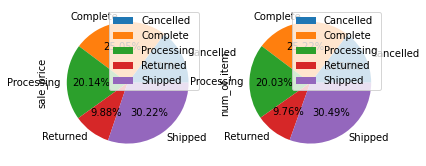

In [ ]:
# Pie Chart Jumlah Penjualan dan Jumlah Barang Berdasarkan Status
round(df.groupby(by=['status'])['sale_price','num_of_item'].sum()).plot(kind='pie', autopct='%.2f%%', subplots=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8202847350>,
      dtype=object)

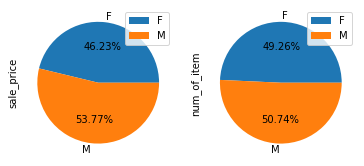

In [ ]:
# Pie Chart Jumlah Penjualan dan Jumlah Barang Berdasarkan Gender
round(df.groupby(by=['gender'])['sale_price','num_of_item'].sum()).plot(kind='pie', autopct='%.2f%%', subplots=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81ff939110>,
      dtype=object)

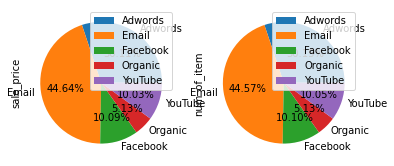

In [ ]:
# Pie Chart Jumlah Penjualan dan Jumlah Barang Berdasarkan Traffic Source
round(df.groupby(by=['traffic_source'])['sale_price','num_of_item'].sum()).plot(kind='pie', autopct='%.2f%%', subplots=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f820420b690>,
      dtype=object)

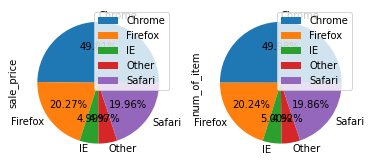

In [ ]:
# Pie Chart Jumlah Penjualan dan Jumlah Barang Berdasarkan Browser
round(df.groupby(by=['browser'])['sale_price','num_of_item'].sum()).plot(kind='pie', autopct='%.2f%%', subplots=True)

Text(0.5, 1.0, 'Top 5 City in terms of Sales')

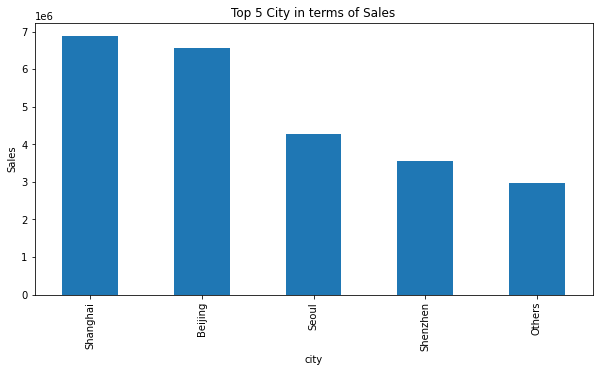

In [ ]:
# Visualisasi Jumlah Penjualan Berdasarkan 5 Kota Teratas

plt.figure(figsize=(10,5))
df.groupby("city")["sale_price"].sum().sort_values(ascending=False).head(5).plot.bar()
plt.ylabel("Sales")
plt.title("Top 5 City in terms of Sales")

Text(0.5, 1.0, 'Top 5 States in terms of Sales')

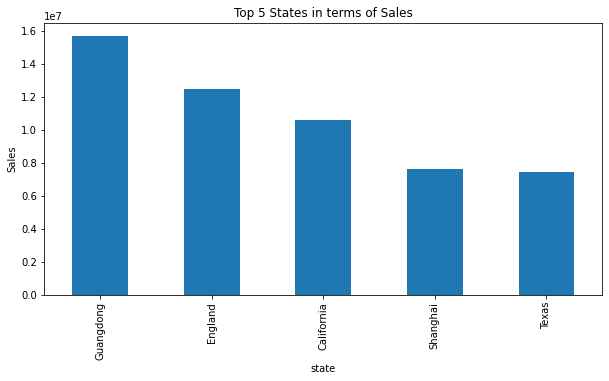

In [ ]:
# Visualisasi Jumlah Penjualan Berdasarkan 5 States Teratas

plt.figure(figsize=(10,5))
df.groupby("state")["sale_price"].sum().sort_values(ascending=False).head(5).plot.bar()
plt.ylabel("Sales")
plt.title("Top 5 States in terms of Sales")

Text(0.5, 1.0, 'Top 5 Postal Code in terms of Sales')

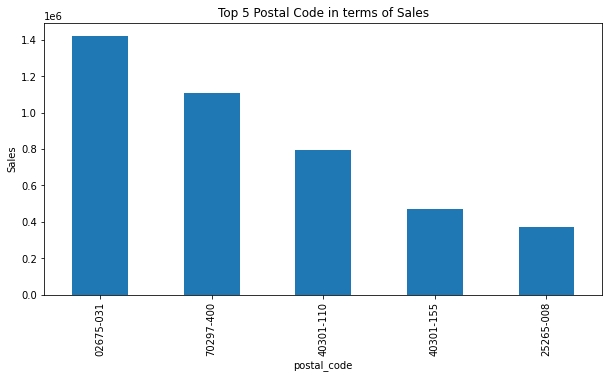

In [ ]:
# Visualisasi Jumlah Penjualan Berdasarkan 5 Postal Code Teratas

plt.figure(figsize=(10,5))
df.groupby("postal_code")["sale_price"].sum().sort_values(ascending=False).head(5).plot.bar()
plt.ylabel("Sales")
plt.title("Top 5 Postal Code in terms of Sales")

Text(0.5, 1.0, 'Top 5 IP Address in terms of Sales')

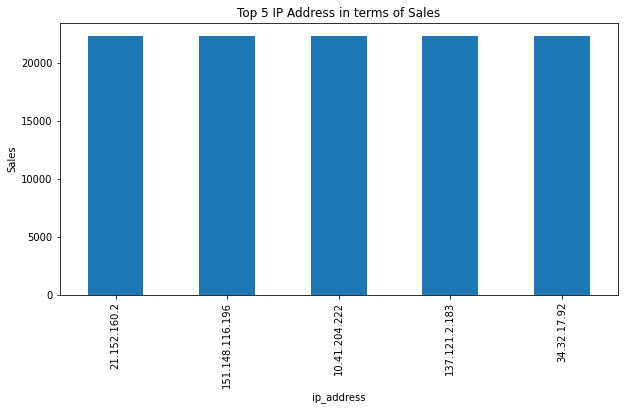

In [ ]:
# Visualisasi Jumlah Penjualan Berdasarkan 5 IP Address Teratas

plt.figure(figsize=(10,5))
df.groupby("ip_address")["sale_price"].sum().sort_values(ascending=False).head(5).plot.bar()
plt.ylabel("Sales")
plt.title("Top 5 IP Address in terms of Sales")

In [ ]:
# Rata-Rata Performa Waktu E-Commerce The Look
## Performa Waktu Pengemasan
diff_kemas = df[(df['shipped_at'] > df['created_at'])]
diff_kemas = diff_kemas['shipped_at'] - diff_kemas['created_at']
print(f'Rata-Rata Lama Waktu Pengemasan adalah : {diff_kemas.mean()}')

## Performa Waktu Pengiriman
diff_kirim = df[(df['delivered_at'] > df['shipped_at'])]
diff_kirim = diff_kirim['delivered_at'] - diff_kirim['shipped_at']
print(f'Rata-Rata Lama Waktu Pengiriman adalah : {diff_kirim.mean()}')

Rata-Rata Lama Waktu Pengemasan adalah : 1 days 16:23:35.461236548
Rata-Rata Lama Waktu Pengiriman adalah : 2 days 18:36:27.801832049


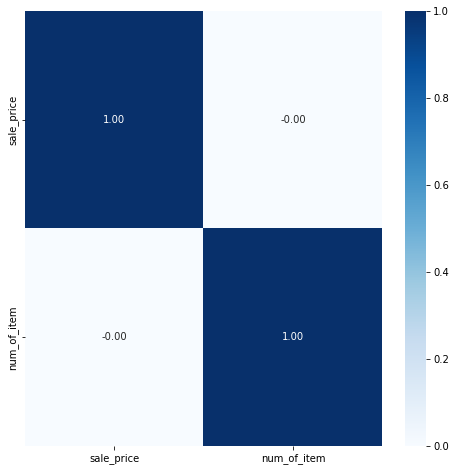

In [ ]:
# Melihat korelasi data
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Text(0.5, 1.0, 'Total sales per day')

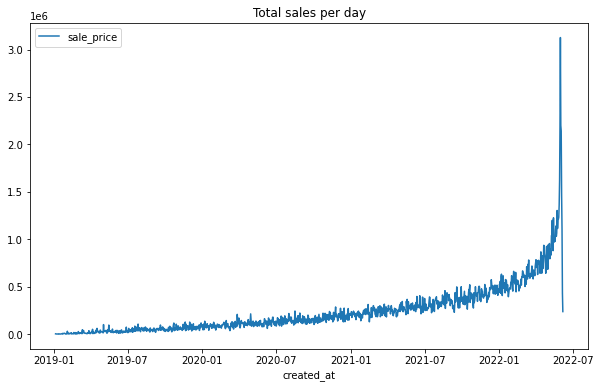

In [ ]:
# Menampilkan grafik penjualan perhari
daily = df.groupby(['created_at'],as_index=False)['sale_price'].sum()
daily = daily.set_index('created_at')
plt.figure(figsize=(10,6))
sns.lineplot(data=daily)
plt.title('Total sales per day')

In [ ]:
# Total penjualan perbulan
print(round(df.groupby('month')['sale_price'].sum()))

# Rata-rata grup penjualan per-bulan
print(round(df.groupby('month')['sale_price'].mean()))

month
1     24852543.0
2     24741021.0
3     30620655.0
4     34269053.0
5     48996216.0
6     20813596.0
7     15069900.0
8     17044284.0
9     16367978.0
10    18531035.0
11    20238228.0
12    22281398.0
Name: sale_price, dtype: float64
month
1     59.0
2     60.0
3     60.0
4     61.0
5     60.0
6     60.0
7     59.0
8     60.0
9     58.0
10    59.0
11    59.0
12    60.0
Name: sale_price, dtype: float64


Text(0.5, 1.0, 'Trend of Total sales per month')

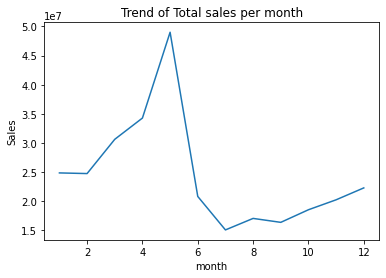

In [ ]:
# Menampilkan grafik penjualan perbulan
df.groupby("month")["sale_price"].sum().plot()
plt.ylabel("Sales")
plt.title("Trend of Total sales per month")

Text(0.5, 1.0, 'Average Sales for each month')

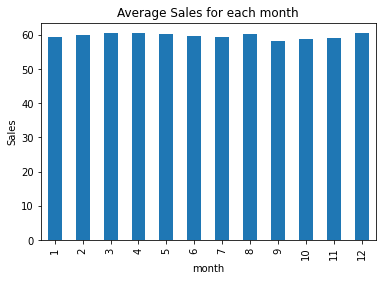

In [ ]:
# Visualisasi Plot Bar rata-rata penjualan per-bulan
df.groupby('month')['sale_price'].mean().plot.bar()
plt.ylabel("Sales")
plt.title("Average Sales for each month")

In [ ]:
# Total penjualan pertahun
print(round(df.groupby('year')['sale_price'].sum()))

# Rata-rata grup penjualan per-tahun
print(round(df.groupby('year')['sale_price'].mean()))

year
2019     13406836.0
2020     48548392.0
2021    114323508.0
2022    117547168.0
Name: sale_price, dtype: float64
year
2019    60.0
2020    60.0
2021    60.0
2022    60.0
Name: sale_price, dtype: float64


Text(0.5, 1.0, 'Trend of Total sales per year')

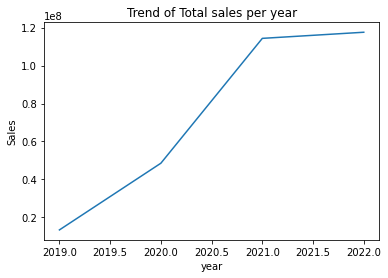

In [ ]:
# Menampilkan grafik penjualan pertahun
df.groupby("year")["sale_price"].sum().plot()
plt.ylabel("Sales")
plt.title("Trend of Total sales per year")

Text(0.5, 1.0, 'Average Sales for each year')

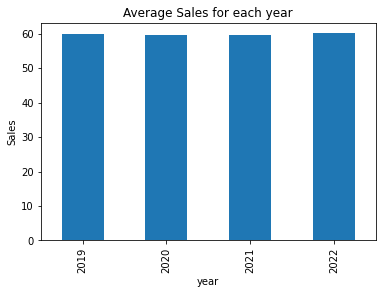

In [ ]:
# Visualisasi Plot Bar rata-rata penjualan per-tahun
df.groupby('year')['sale_price'].mean().plot.bar()
plt.ylabel("Sales")
plt.title("Average Sales for each year")

## Time Series Plot

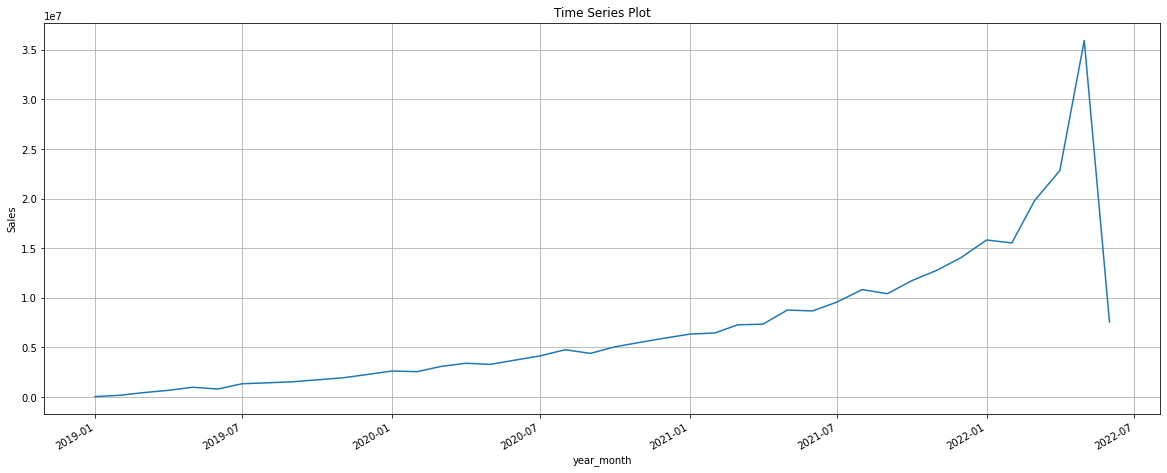

In [ ]:
## Membuat variabel year-month
df["year_month"] = df["year"].astype(str) + "-" + df["month"].astype(str)
df["year_month"] = pd.to_datetime(df["year_month"]).dt.date

## Plotting Time-Series
fig, ax = plt.subplots(figsize=(20,8))
plt.ylabel("Sales")
plt.title("Time Series Plot")

half_year_locator = mdates.MonthLocator(interval = 6)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

df.groupby("year_month")["sale_price"].sum().plot()
fig.autofmt_xdate()
plt.grid()
plt.show()

In [ ]:
# Membuat data frame yang berisi sales dan year month
df_trend = round(df[["year_month","sale_price"]].groupby("year_month").sum())
df_trend = df_trend.sort_values(by="year_month", ascending=True)
df_trend.head(10)

,sale_price
year_month,
2019-01-01,45806.0
2019-02-01,180538.0
2019-03-01,442753.0
2019-04-01,677954.0
2019-05-01,988184.0
2019-06-01,809681.0
2019-07-01,1345976.0
2019-08-01,1434776.0
2019-09-01,1542479.0


## Stationary Check

### Rolling Statistics Test
Rolling Statisctics Test biasa digunakan untuk melihat trends stasioner atau tidak. Berdasarkan definisi, rolling memiliki arti yaitu membuat rolling window dengan ukuran yang spesifik dan akan melakukan kalkulasi pada data dalam window tsb, yang kemudian akan bergeser terus kebawah seperti yang ditunjukkan pada gambar di bawah.

In [ ]:
# rolling dengan interval window sebesar 4 bulan dan hitung rata-rata
rolmean=df_trend.rolling(window=4).mean()  

# rolling dengan interval window sebesar 4 bulan dan hitung st. deviasi
rolstd=df_trend.rolling(window=4).std() 

# Tampilkan 10 baris pertama dari hasil rolling mean
print('10 baris pertama rolling mean: ')
print(rolmean.head(10))                
print ('')

# Tampilkan 10 baris pertama dari hasil rolling st. deviasi
print('10 baris pertama std. deviasi: ')
print(rolstd.head(10))            

10 baris pertama rolling mean: 
            sale_price
year_month            
2019-01-01         NaN
2019-02-01         NaN
2019-03-01         NaN
2019-04-01   336762.75
2019-05-01   572357.25
2019-06-01   729643.00
2019-07-01   955448.75
2019-08-01  1144654.25
2019-09-01  1283228.00
2019-10-01  1515048.00

10 baris pertama std. deviasi: 
               sale_price
year_month               
2019-01-01            NaN
2019-02-01            NaN
2019-03-01            NaN
2019-04-01  280895.831852
2019-05-01  343696.642363
2019-06-01  229657.103051
2019-07-01  289732.464412
2019-08-01  295178.530270
2019-09-01  325761.646002
2019-10-01  168351.590922


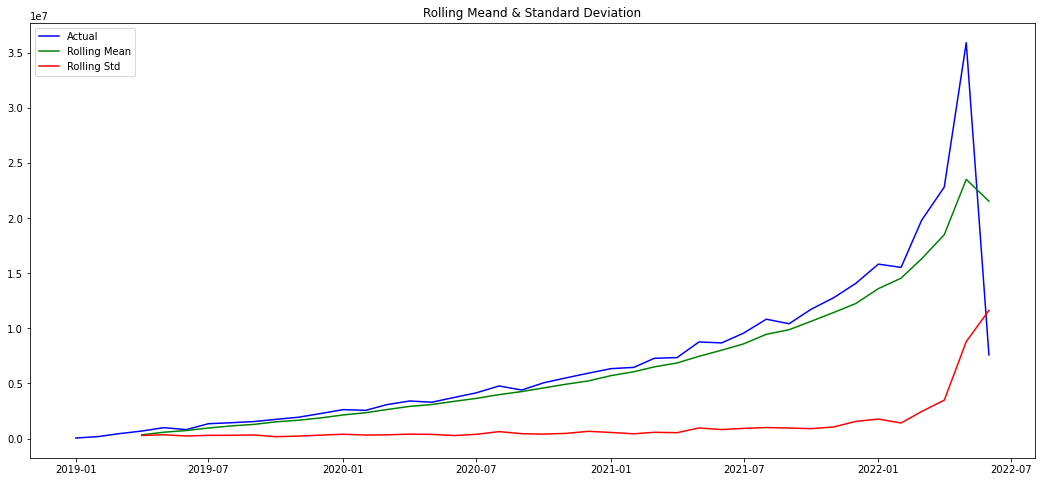

In [ ]:
# Membuat multiple line chart berdasarkan warna dan label
plt.figure(figsize=(18,8))
actual=plt.plot(df_trend, color='blue', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='red', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Meand & Standard Deviation')
plt.show(block=False)

**Interpretasi:**

Dari grafik di atas, dapat dilihat bahwa data aktual dan rolling (mean dan std) memiliki bentuk yang hampir sama, menandakan bahwa **series** ini **stasioner**.

### Shift Test

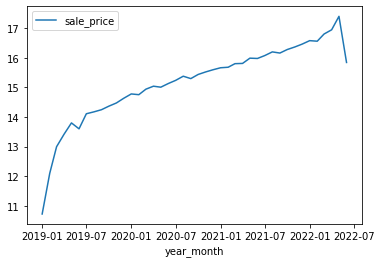

In [ ]:
# Melihat data dalam bentuk log
df_log = np.log(df_trend)
df_log.plot()

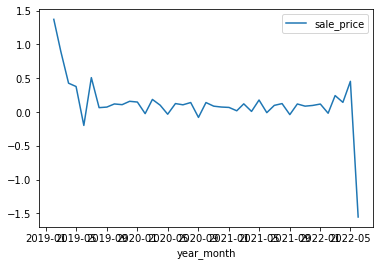

In [ ]:
# Membuat kerangka data baru yang digeser 1 bulan
sale_shift = df_log - df_log.shift()
sale_shift.dropna(inplace=True)
sale_shift.plot()

### Autocorrelation Function Test

**Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**
* ACF adalah korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana  (Xt , Xk+t) dengan k adalah jumlah log dan t adalah nilainya.

* Sama halnya dengan ACF, PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data  Xt+1 sampai dengan Xt+k-1

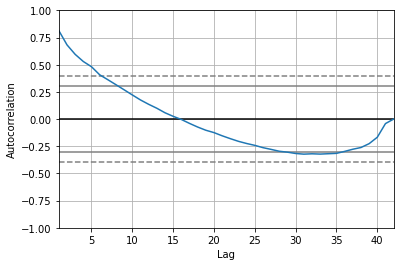

In [ ]:
# autocorrelation
autocorrelation_plot(df_log)

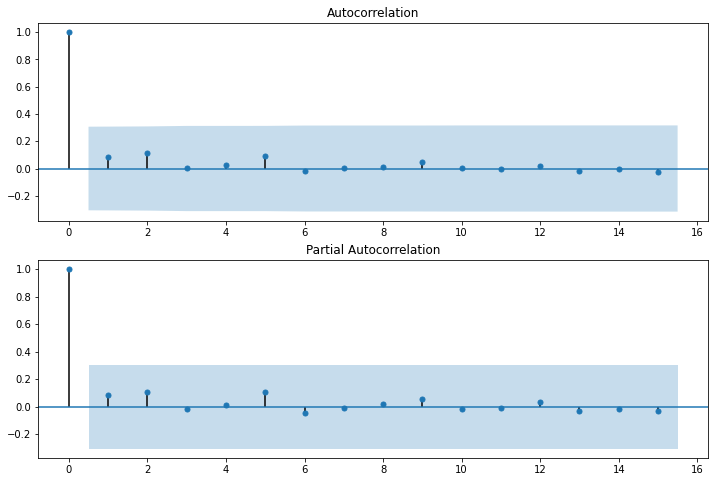

In [ ]:
# check acf & pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sale_shift.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sale_shift.dropna(),lags=15,ax=ax2)

**Interpretasi:**
* Dari grafik di atas terlihat bahwa grafik time series (berwarna biru) berpotongan dengan grafik shift time series baik pada batas atas maupun bawah, sehingga dapat dikatakan bahwa grafik time **series** ini mengalami efek auto correlation. 

In [ ]:
# Mengubah data kategorikal ke data numerikal
le = preprocessing.LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["ip_address"]=le.fit_transform(df["ip_address"])
df["city"]=le.fit_transform(df["city"])
df["state"]=le.fit_transform(df["state"])
df["postal_code"]=le.fit_transform(df["postal_code"])
df["browser"]=le.fit_transform(df["browser"])
df["traffic_source"]=le.fit_transform(df["traffic_source"])

# Modelling 

Pada bagian ini, dilakukan proses pembuatan Modelling untuk melihat peramalan data jumlah penjualan pada 2 tahun kedepan dan melakukan churn analysis untuk menghindari terjadinya churn pada perusahaan The Look.

## Time Series Forecasting

Model yang digunakan untuk analisis time series forecasting yaitu **ARIMA** dan **SARIMAX**.

### ARIMA

In [ ]:
# Auto ARIMA Forecast

from statsmodels.tsa.arima_model import ARIMA
# !pip install pmdarima
import pmdarima as pm

model = pm.auto_arima(df_log, start_p=1, start_q=1,
                      test='adf',      
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=51.715, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=349.956, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=51.357, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=53.072, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=50.079, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=49.740, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 2.713 seconds
       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,


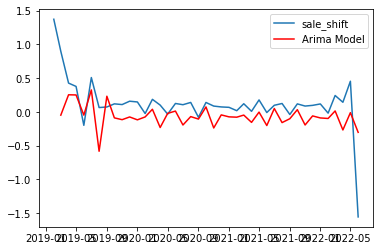

In [ ]:
# Membuat dan Fitting ARIMA model dengan AR of order 1, differencing of order 2 and MA of order 0

model = ARIMA(df_log, order=(1,2,0))
results = model.fit(disp=-1)
plt.plot(sale_shift, label = "sale_shift")
plt.plot(results.fittedvalues, color='red', label = "Arima Model")
plt.legend(loc='best')

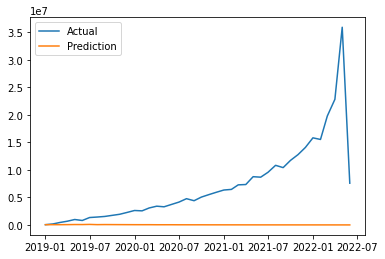

In [ ]:
# Menampilkan Perbandingan Prediksi ARIMA dengan data sebenarnya
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['sale_price'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(df.groupby("year_month")["sale_price"].sum(), label = "Actual")
plt.plot(predictions_ARIMA, label = "Prediction")
plt.legend(loc='best')

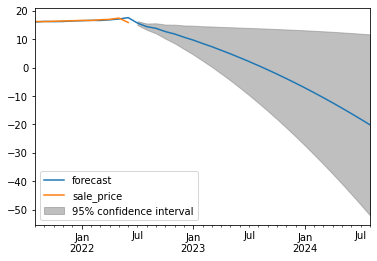

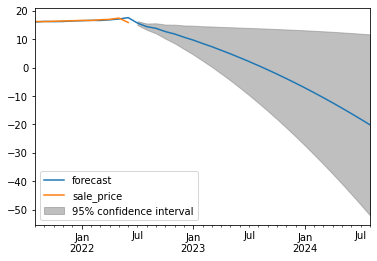

In [ ]:
# Memperpanjang Forecast
results.plot_predict(31,67, dynamic = False)

In [ ]:
# Evaluasi Model ARIMA
mae = np.mean(np.abs(results.resid))
mse = np.mean(results.resid**2)
rmse = np.sqrt(mse)

# Print Evaluasi Model
print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')

MAE = 0.20889709793864125
MSE = 0.12042370485347031
RMSE = 0.34702118790279984


### SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  params_exog = []
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  self.k_ar > 0 and
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


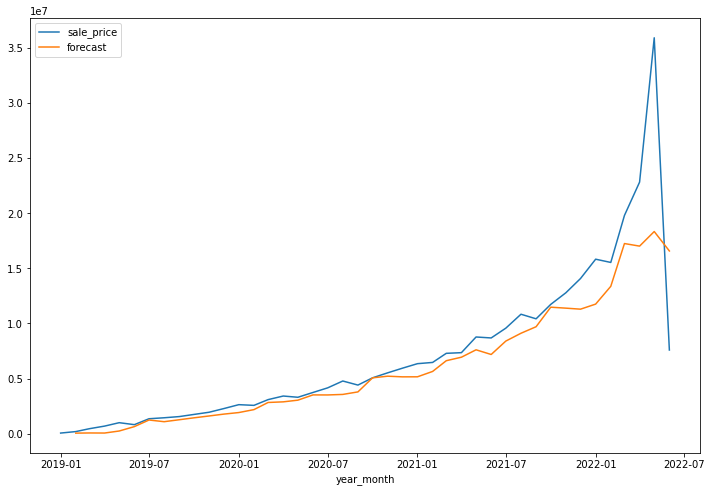

In [ ]:
# Modelling SARIMAX pada data penjualan
import statsmodels.api as sm
sarimax = sm.tsa.statespace.SARIMAX(df_trend["sale_price"], order=(2, 0, 3))
results_sarimax = sarimax.fit()

df_trend['forecast']=results_sarimax.predict(start=1,end=43,dynamic=False)
df_trend[['sale_price','forecast']].plot(figsize=(12,8))

In [ ]:
print(results_sarimax.summary())

                           Statespace Model Results                           
Dep. Variable:             sale_price   No. Observations:                   42
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -698.055
Date:                Wed, 22 Jun 2022   AIC                           1408.109
Time:                        01:26:49   BIC                           1418.535
Sample:                    01-01-2019   HQIC                          1411.931
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1128      0.429      0.263      0.793      -0.728       0.954
ar.L2          0.8782      0.425      2.068      0.039       0.046       1.711
ma.L1         -0.6607      0.432     -1.529      0.1

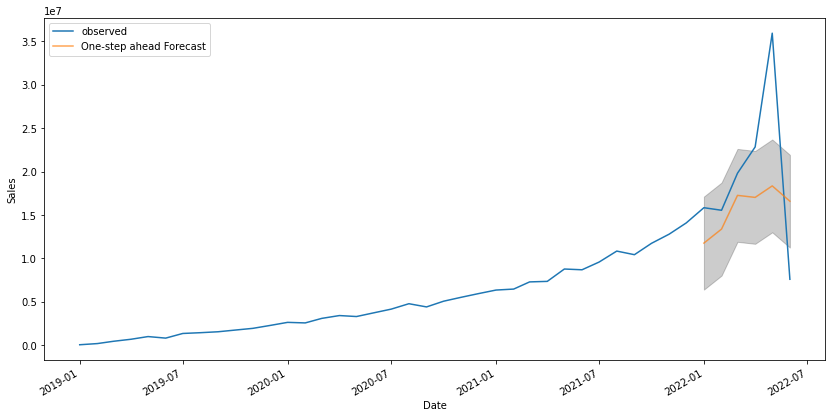

In [ ]:
# Validasi Prediksi 
pred = results_sarimax.get_prediction(start=pd.to_datetime('2022-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_trend["sale_price"].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

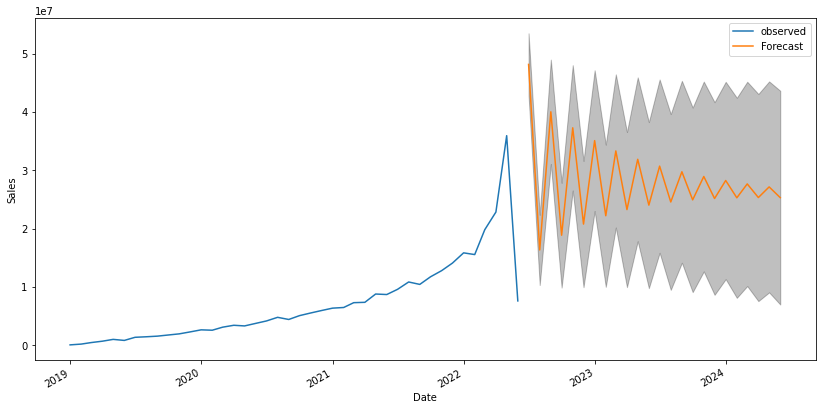

In [ ]:
# Memperpanjang Forecasting
pred_uc = results_sarimax.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df_trend['sale_price'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

## Churn Analysis

Model yang digunakan untuk analisis churn yaitu **Random Forest** dan **Naive Bayes**.

In [ ]:
# Membuat Kolom untuk Variabel Target
## Kondisi untuk Variabel Target
conditions = [
    (df['status'] == 'Completed'),
    (df['status'] == 'Shipped'),
    (df['status'] == 'Processing'),
    (df['status'] == 'Returned'),
    (df['status'] == 'Cancelled')
    ]

values = [0,0,0,1,1]
df['churn'] = np.select(conditions,values)

In [ ]:
# Sampling Data 
df_sample = df.sample(frac=0.25)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Mendefinisikan x and y
X = df_sample[["gender", "ip_address", "browser", "traffic_source","num_of_item","sale_price"]]
y = df_sample['churn']

# Scalling Data
X_norm = X
columns =X_norm.columns
min_max_scaler_test = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler_test.fit_transform(X_norm)
X_normalized = pd.DataFrame(np_scaled, columns = columns)

# pembagian data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state = 0, stratify = y)
y_train = y_train.ravel() 
y_test = y_test.values.ravel() 

In [ ]:
# Menangani Imbalanced Data
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 210392
Before OverSampling, counts of label '0': 649261 

After OverSampling, the shape of train_X: (1298522, 6)
After OverSampling, the shape of train_y: (1298522,) 

After OverSampling, counts of label '1': 649261
After OverSampling, counts of label '0': 649261


### Random Forest 
Random Forest adalah kumpulan dari decision tree. Algoritma ini merupakan ensemble learning yang dibangun dari kombinasi masing-masing tree pada decision tree yang kemudian digabungkan menjadi satu model dengan menerapkan metode bootstrap aggregating (bagging) dan random feature selection. 

#### Modelling Random Forest

In [ ]:
# Membuat Model Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

#### Evaluasi Model Random Forest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 10.6 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.14-py2.py3-none-any.whl size=33654 sha256=34e7a85783dce3be3217eee29775fbff41e42798e1b94ba9ed502a106801d8cc
  Stored in directory: /root/.cache/pip/wheels/d9/6a/86/9a622c06f65732afe0e31c02a92fae6ab663ffd7162bcf5125
Successfully built jcopml


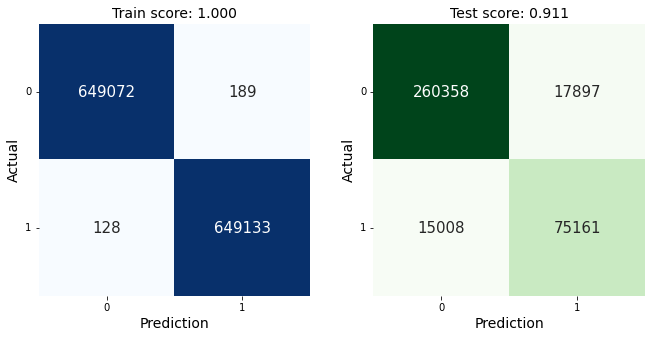

In [ ]:
clf = RandomForestClassifier(bootstrap=True, n_estimators=100, 
                             max_depth = 100, max_features='log2', random_state=0)
clf = clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

# Melihat evaluasi model menggunakan confusion matrix
!pip3 install jcopml
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train_res, y_train_res, X_test, y_test, clf)

In [ ]:
# Melihat hasil klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94    278255
           1       0.81      0.83      0.82     90169

    accuracy                           0.91    368424
   macro avg       0.88      0.88      0.88    368424
weighted avg       0.91      0.91      0.91    368424



### Naive Bayes

Naive Bayes merupakan salah satu algoritma klasifikasi yang menggunakan perhitungan probabilitas dan statistik untuk memprediksi probabilitas di masa depan berdasarkan pengalaman sebelumnya.

#### Modelling Naive Bayes

In [ ]:
# Membuat Model Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

#### Evaluasi Model Naive Bayes

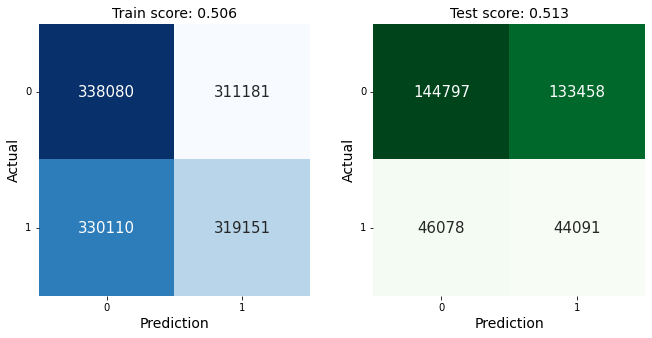

In [ ]:
clf = clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

# Melihat evaluasi model menggunakan confusion matrix
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train_res, y_train_res, X_test, y_test, clf)

In [ ]:
# Melihat hasil klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62    278255
           1       0.25      0.49      0.33     90169

    accuracy                           0.51    368424
   macro avg       0.50      0.50      0.47    368424
weighted avg       0.63      0.51      0.55    368424

